In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
train_datagen = image.ImageDataGenerator(rescale=1/255, horizontal_flip=True, zoom_range=0.2)
train_data = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Covid dataset/Covid19-dataset/train',
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary'
)

test_datagen = image.ImageDataGenerator(rescale=1/255)
test_data = test_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Covid dataset/Covid19-dataset/test',
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary'
)

Found 181 images belonging to 2 classes.
Found 46 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                   

In [8]:
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=60,
    validation_data=test_data,
    validation_steps=test_data.samples // test_data.batch_size
)

Epoch 1/60
11/11 [==============================] - 104s 9s/step - loss: 1.1695 - accuracy: 0.5758 - val_loss: 0.6851 - val_accuracy: 0.8438
Epoch 2/60
11/11 [==============================] - 82s 7s/step - loss: 0.5937 - accuracy: 0.7333 - val_loss: 0.4504 - val_accuracy: 0.7812
Epoch 3/60
11/11 [==============================] - 85s 7s/step - loss: 0.4146 - accuracy: 0.8121 - val_loss: 0.2482 - val_accuracy: 0.9375
Epoch 4/60
11/11 [==============================] - 84s 8s/step - loss: 0.3042 - accuracy: 0.8848 - val_loss: 0.1643 - val_accuracy: 0.9375
Epoch 5/60
11/11 [==============================] - 94s 8s/step - loss: 0.3381 - accuracy: 0.8977 - val_loss: 0.3689 - val_accuracy: 0.9062
Epoch 6/60
11/11 [==============================] - 91s 8s/step - loss: 0.2282 - accuracy: 0.9212 - val_loss: 0.3102 - val_accuracy: 0.9062
Epoch 7/60
11/11 [==============================] - 85s 8s/step - loss: 0.2800 - accuracy: 0.8970 - val_loss: 0.2445 - val_accuracy: 0.9688
Epoch 8/60
11/11 [=

In [9]:
y_pred = model.predict(test_data)
y_pred = (y_pred > 0.5).astype(int).ravel()
y_true = test_data.classes

3/3 [==============================] - 6s 2s/step


In [10]:
TP = np.sum((y_pred == 1) & (y_true == 1))
FP = np.sum((y_pred == 1) & (y_true == 0))
FN = np.sum((y_pred == 0) & (y_true == 1))
TN = np.sum((y_pred == 0) & (y_true == 0))

print(f'True Positives (TP): {TP}')
print(f'False Positives (FP): {FP}')
print(f'True Negatives (TN): {TN}')
print(f'False Negatives (FN): {FN}')

True Positives (TP): 10
False Positives (FP): 12
True Negatives (TN): 14
False Negatives (FN): 10


In [11]:
cm = confusion_matrix(y_true, y_pred)

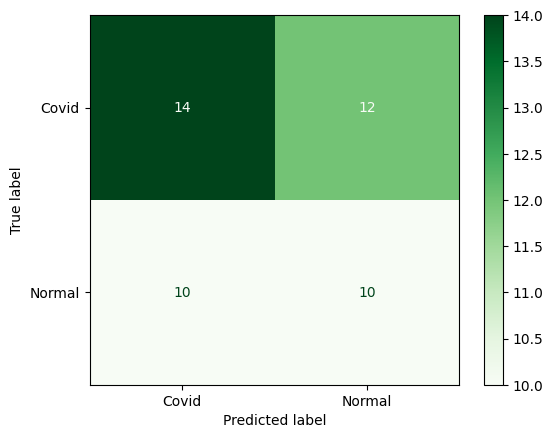

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_data.class_indices.keys())
disp.plot(cmap=plt.cm.Greens)
plt.show()

In [13]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Accuracy')

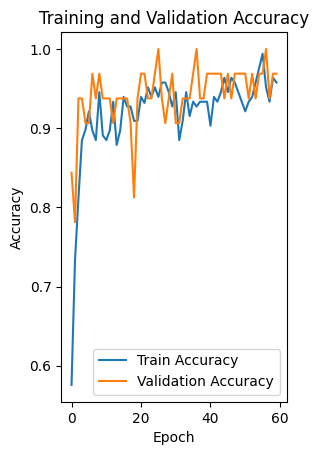

In [14]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

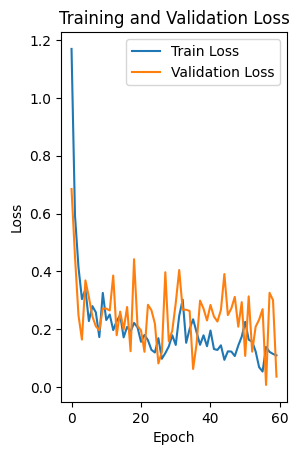

In [15]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [16]:
accuracy = TP+TN/TP+TN+FN+FP
print(f'Accuracy:{accuracy}')

Accuracy:47.4


In [17]:
precision = TP/TP+FP
print(f'Precision:{precision}')

Precision:13.0


In [18]:
recall = TP/TP+FN
print(f'Recall:{recall}')

Recall:11.0


In [19]:
f1score = 2*precision*recall/precision+recall
print(f'F1 Score:{f1score}')

F1 Score:33.0


In [22]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_true,y_pred)

0.45454545454545453

In [23]:
recall_score(y_true,y_pred)

0.5

In [24]:
from sklearn.metrics import f1_score
f1_score(y_true,y_pred)

0.47619047619047616

1/1 [==============================] - 0s 199ms/step
Prediction Of Our Model :  Positive For Covid-19


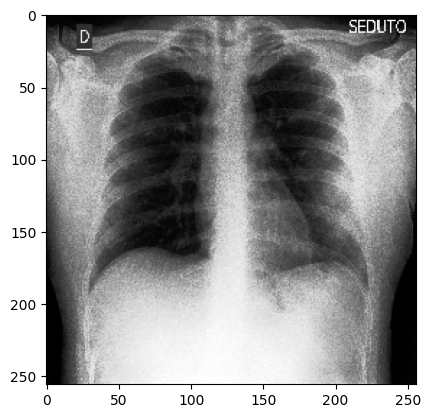

In [25]:
import numpy as np
import cv2
from keras.preprocessing import image
path = "/content/drive/MyDrive/Covid dataset/Covid19-dataset/train/Covid/02.jpeg"
img = image.load_img(path,target_size=(256,256,3))
plt.imshow(img)
img=np.array([img])
img.shape
results = model.predict(img)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

1/1 [==============================] - 0s 108ms/step
Prediction Of Our Model :  Negative for Covid-19


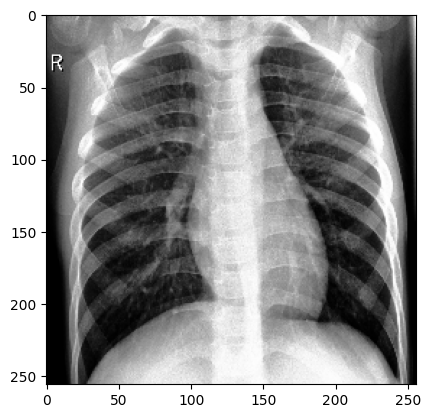

In [26]:
import numpy as np
import cv2
from keras.preprocessing import image
path = "/content/drive/MyDrive/Covid dataset/Covid19-dataset/test/Normal/0122.jpeg"
img = image.load_img(path,target_size=(256,256,3))
plt.imshow(img)
img=np.array([img])
img.shape
results = model.predict(img)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GaussianNoise, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import mean_squared_error
import os

In [28]:
# Data Preparation
train_datagen = image.ImageDataGenerator(rescale=1/255, horizontal_flip=True, zoom_range=0.2)
train_data = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Covid dataset/Covid19-dataset/train',
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary',
    shuffle=True
)

test_datagen = image.ImageDataGenerator(rescale=1/255)
test_data = test_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Covid dataset/Covid19-dataset/test',
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary',
    shuffle=False
)

# Convert the data to numpy arrays
def convert_to_numpy(data):
    images, labels = [], []
    for i in range(data.samples): # Iterate over the expected number of samples
        img, label = data.next() # Get the next batch (one image and label at a time)
        images.append(img[0]) # Append the first (and only) image from the batch
        labels.append(label[0]) # Append the first (and only) label from the batch
    return np.array(images), np.array(labels)

x_train, y_train = convert_to_numpy(train_data)
x_test, y_test = convert_to_numpy(test_data)

# Normalize and reshape data for dense autoencoders
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape data for dense autoencoders
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
input_dim = x_train_flat.shape[1]
encoding_dim = 64

Found 181 images belonging to 2 classes.
Found 46 images belonging to 2 classes.


In [29]:
# Basic Autoencoder
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

basic_autoencoder = Model(input_img, decoded)
basic_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

history_basic = basic_autoencoder.fit(x_train_flat, x_train_flat,
                                      epochs=50,
                                      batch_size=256,
                                      shuffle=True,
                                      validation_data=(x_test_flat, x_test_flat))

# Reconstruction
reconstructed_basic = basic_autoencoder.predict(x_test_flat)
mse_basic = mean_squared_error(x_test_flat, reconstructed_basic)
print(f'Basic Autoencoder MSE: {mse_basic}')

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.6931 - val_loss: 0.6929
Epoch 2/50
1/1 [==============================] - 3s 3s/step - loss: 0.6929 - val_loss: 0.6927
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 0.6927 - val_loss: 0.6924
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 0.6924 - val_loss: 0.6921
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 0.6921 - val_loss: 0.6917
Epoch 6/50
1/1 [==============================] - 3s 3s/step - loss: 0.6917 - val_loss: 0.6914
Epoch 7/50
1/1 [==============================] - 4s 4s/step - loss: 0.6914 - val_loss: 0.6910
Epoch 8/50
1/1 [==============================] - 2s 2s/step - loss: 0.6911 - val_loss: 0.6907
Epoch 9/50
1/1 [==============================] - 3s 3s/step - loss: 0.6907 - val_loss: 0.6903
Epoch 10/50
1/1 [==============================] - 3s 3s/step - loss: 0.6903 - val_loss: 0.6898
Epoch 11/50
1/1 [==============================] 

In [31]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define your input dimension and encoding dimension
input_dim = x_train_flat.shape[1]  # Adjust based on your data
encoding_dim = 64  # Example encoding dimension

# Basic autoencoder
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

basic_autoencoder = Model(input_img, decoded)
basic_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history_basic = basic_autoencoder.fit(x_train_flat, x_train_flat,
                                      epochs=50,
                                      batch_size=256,
                                      shuffle=True,
                                      validation_data=(x_test_flat, x_test_flat))

reconstructed_basic = basic_autoencoder.predict(x_test_flat)

def mean_squared_error(actual, predicted):
    mse = np.mean((actual - predicted) ** 2, axis=1)
    return mse

reconstruction_errors = mean_squared_error(x_test_flat, reconstructed_basic)

threshold = np.mean(reconstruction_errors) + np.std(reconstruction_errors)

y_pred = (reconstruction_errors > threshold).astype(int)
num_samples = len(x_test_flat)
y_true = np.concatenate([np.zeros(num_samples // 2), np.ones(num_samples // 2)])

# Calculate confusion matrix and other metrics
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.6931 - val_loss: 0.6929
Epoch 2/50
1/1 [==============================] - 3s 3s/step - loss: 0.6929 - val_loss: 0.6927
Epoch 3/50
1/1 [==============================] - 4s 4s/step - loss: 0.6927 - val_loss: 0.6924
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 0.6924 - val_loss: 0.6921
Epoch 5/50
1/1 [==============================] - 4s 4s/step - loss: 0.6921 - val_loss: 0.6917
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 0.6917 - val_loss: 0.6914
Epoch 7/50
1/1 [==============================] - 4s 4s/step - loss: 0.6914 - val_loss: 0.6910
Epoch 8/50
1/1 [==============================] - 3s 3s/step - loss: 0.6910 - val_loss: 0.6907
Epoch 9/50
1/1 [==============================] - 3s 3s/step - loss: 0.6907 - val_loss: 0.6902
Epoch 10/50
1/1 [==============================] - 3s 3s/step - loss: 0.6902 - val_loss: 0.6897
Epoch 11/50
1/1 [==============================] 

2/2 [==============================] - 0s 41ms/step
Confusion Matrix:
 [[15  8]
 [16  7]]
Accuracy: 0.4782608695652174
Precision: 0.4666666666666667
Recall: 0.30434782608695654
F1 Score: 0.3684210526315789


In [33]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense, GaussianNoise
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define your input dimension and encoding dimension
input_dim = x_train_flat.shape[1]  # Adjust based on your data
encoding_dim = 64  # Example encoding dimension

# Define the denoising autoencoder
input_img = Input(shape=(input_dim,))
noise = GaussianNoise(0.1)(input_img)
encoded = Dense(encoding_dim, activation='relu')(noise)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

denoising_autoencoder = Model(input_img, decoded)
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the denoising autoencoder
history_denoising = denoising_autoencoder.fit(x_train_flat, x_train_flat,
                                              epochs=50,
                                              batch_size=256,
                                              shuffle=True,
                                              validation_data=(x_test_flat, x_test_flat))

# Reconstruct the test set
reconstructed_denoising = denoising_autoencoder.predict(x_test_flat)

# Calculate the Mean Squared Error (MSE)
def mean_squared_error(actual, predicted):
    mse = np.mean((actual - predicted) ** 2, axis=1)
    return mse

# Calculate reconstruction error for each test sample
reconstruction_errors_denoising = mean_squared_error(x_test_flat, reconstructed_denoising)

# Define a threshold for classification (you can tune this threshold based on your dataset)
threshold_denoising = np.mean(reconstruction_errors_denoising) + np.std(reconstruction_errors_denoising)
y_pred_denoising = (reconstruction_errors_denoising > threshold_denoising).astype(int)
num_samples = len(x_test_flat)
y_true = np.concatenate([np.zeros(num_samples // 2), np.ones(num_samples // 2)])

# Calculate confusion matrix and other metrics
conf_matrix_denoising = confusion_matrix(y_true, y_pred_denoising)
accuracy_denoising = accuracy_score(y_true, y_pred_denoising)
precision_denoising = precision_score(y_true, y_pred_denoising)
recall_denoising = recall_score(y_true, y_pred_denoising)
f1_denoising = f1_score(y_true, y_pred_denoising)

print(f"Denoising Autoencoder MSE: {np.mean(reconstruction_errors_denoising)}")
print("Confusion Matrix:\n", conf_matrix_denoising)
print("Accuracy:", accuracy_denoising)
print("Precision:", precision_denoising)
print("Recall:", recall_denoising)
print("F1 Score:", f1_denoising)


Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.6931 - val_loss: 0.6929
Epoch 2/50
1/1 [==============================] - 5s 5s/step - loss: 0.6928 - val_loss: 0.6926
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 0.6925 - val_loss: 0.6923
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 0.6920 - val_loss: 0.6919
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 0.6915 - val_loss: 0.6913
Epoch 6/50
1/1 [==============================] - 4s 4s/step - loss: 0.6909 - val_loss: 0.6905
Epoch 7/50
1/1 [==============================] - 4s 4s/step - loss: 0.6901 - val_loss: 0.6893
Epoch 8/50
1/1 [==============================] - 3s 3s/step - loss: 0.6890 - val_loss: 0.6876
Epoch 9/50
1/1 [==============================] - 3s 3s/step - loss: 0.6873 - val_loss: 0.6851
Epoch 10/50
1/1 [==============================] - 4s 4s/step - loss: 0.6853 - val_loss: 0.6816
Epoch 11/50
1/1 [==============================] 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.regularizers import l1
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define your input dimension and encoding dimension
input_dim = x_train_flat.shape[1]  # Adjust based on your data
encoding_dim = 64  # Example encoding dimension

# Define the sparse autoencoder
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=l1(10e-5))(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

sparse_autoencoder = Model(input_img, decoded)
sparse_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the sparse autoencoder
history_sparse = sparse_autoencoder.fit(x_train_flat, x_train_flat,
                                        epochs=50,
                                        batch_size=256,
                                        shuffle=True,
                                        validation_data=(x_test_flat, x_test_flat))

# Reconstruct the test set
reconstructed_sparse = sparse_autoencoder.predict(x_test_flat)

# Calculate the Mean Squared Error (MSE)
def mean_squared_error(actual, predicted):
    mse = np.mean((actual - predicted) ** 2, axis=1)
    return mse

# Calculate reconstruction error for each test sample
reconstruction_errors_sparse = mean_squared_error(x_test_flat, reconstructed_sparse)

# Define a threshold for classification (you can tune this threshold based on your dataset)
threshold_sparse = np.mean(reconstruction_errors_sparse) + np.std(reconstruction_errors_sparse)

# Classify samples as normal (0) or anomalous (1) based on reconstruction error
y_pred_sparse = (reconstruction_errors_sparse > threshold_sparse).astype(int)
num_samples = len(x_test_flat)
y_true = np.concatenate([np.zeros(num_samples // 2), np.ones(num_samples // 2)])

# Calculate confusion matrix and other metrics
conf_matrix_sparse = confusion_matrix(y_true, y_pred_sparse)
accuracy_sparse = accuracy_score(y_true, y_pred_sparse)
precision_sparse = precision_score(y_true, y_pred_sparse)
recall_sparse = recall_score(y_true, y_pred_sparse)
f1_sparse = f1_score(y_true, y_pred_sparse)

print(f"Sparse Autoencoder MSE: {np.mean(reconstruction_errors_sparse)}")
print("Confusion Matrix:\n", conf_matrix_sparse)
print("Accuracy:", accuracy_sparse)
print("Precision:", precision_sparse)
print("Recall:", recall_sparse)
print("F1 Score:", f1_sparse)


Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 0.6932 - val_loss: 0.6929
Epoch 2/50
1/1 [==============================] - 3s 3s/step - loss: 0.6929 - val_loss: 0.6927
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 0.6927 - val_loss: 0.6924
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 0.6924 - val_loss: 0.6921
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 0.6921 - val_loss: 0.6917
Epoch 6/50
1/1 [==============================] - 5s 5s/step - loss: 0.6917 - val_loss: 0.6914
Epoch 7/50
1/1 [==============================] - 3s 3s/step - loss: 0.6914 - val_loss: 0.6911
Epoch 8/50
1/1 [==============================] - 4s 4s/step - loss: 0.6911 - val_loss: 0.6907
Epoch 9/50
1/1 [==============================] - 3s 3s/step - loss: 0.6907 - val_loss: 0.6904
Epoch 10/50
1/1 [==============================] - 4s 4s/step - loss: 0.6904 - val_loss: 0.6900
Epoch 11/50
1/1 [==============================] 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define your input dimension and encoding dimension
input_dim = x_train_flat.shape[1]  # Adjust based on your data
encoding_dim = 64  # Example encoding dimension

# Define the undercomplete autoencoder
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

undercomplete_autoencoder = Model(input_img, decoded)
undercomplete_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the undercomplete autoencoder
history_undercomplete = undercomplete_autoencoder.fit(x_train_flat, x_train_flat,
                                                      epochs=50,
                                                      batch_size=256,
                                                      shuffle=True,
                                                      validation_data=(x_test_flat, x_test_flat))

# Reconstruct the test set
reconstructed_undercomplete = undercomplete_autoencoder.predict(x_test_flat)

# Calculate the Mean Squared Error (MSE)
def mean_squared_error(actual, predicted):
    mse = np.mean((actual - predicted) ** 2, axis=1)
    return mse

# Calculate reconstruction error for each test sample
reconstruction_errors_undercomplete = mean_squared_error(x_test_flat, reconstructed_undercomplete)

# Define a threshold for classification (you can tune this threshold based on your dataset)
threshold_undercomplete = np.mean(reconstruction_errors_undercomplete) + np.std(reconstruction_errors_undercomplete)

# Classify samples as normal (0) or anomalous (1) based on reconstruction error
y_pred_undercomplete = (reconstruction_errors_undercomplete > threshold_undercomplete).astype(int)
num_samples = len(x_test_flat)
y_true = np.concatenate([np.zeros(num_samples // 2), np.ones(num_samples // 2)])

# Calculate confusion matrix and other metrics
conf_matrix_undercomplete = confusion_matrix(y_true, y_pred_undercomplete)
accuracy_undercomplete = accuracy_score(y_true, y_pred_undercomplete)
precision_undercomplete = precision_score(y_true, y_pred_undercomplete)
recall_undercomplete = recall_score(y_true, y_pred_undercomplete)
f1_undercomplete = f1_score(y_true, y_pred_undercomplete)

print(f"Undercomplete Autoencoder MSE: {np.mean(reconstruction_errors_undercomplete)}")
print("Confusion Matrix:\n", conf_matrix_undercomplete)
print("Accuracy:", accuracy_undercomplete)
print("Precision:", precision_undercomplete)
print("Recall:", recall_undercomplete)
print("F1 Score:", f1_undercomplete)


Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.6931 - val_loss: 0.6929
Epoch 2/50
1/1 [==============================] - 4s 4s/step - loss: 0.6929 - val_loss: 0.6927
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 0.6927 - val_loss: 0.6924
Epoch 4/50
1/1 [==============================] - 4s 4s/step - loss: 0.6924 - val_loss: 0.6921
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 0.6921 - val_loss: 0.6917
Epoch 6/50
1/1 [==============================] - 4s 4s/step - loss: 0.6917 - val_loss: 0.6914
Epoch 7/50
1/1 [==============================] - 3s 3s/step - loss: 0.6914 - val_loss: 0.6911
Epoch 8/50
1/1 [==============================] - 3s 3s/step - loss: 0.6911 - val_loss: 0.6907
Epoch 9/50
1/1 [==============================] - 3s 3s/step - loss: 0.6907 - val_loss: 0.6903
Epoch 10/50
1/1 [==============================] - 3s 3s/step - loss: 0.6903 - val_loss: 0.6898
Epoch 11/50
1/1 [==============================] 

In [38]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define your input dimension and encoding dimension
input_dim = x_train_flat.shape[1]  # Adjust based on your data
encoding_dim = 64  # Example encoding dimension

# Define the deep autoencoder
input_img = Input(shape=(input_dim,))
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

deep_autoencoder = Model(input_img, decoded)
deep_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the deep autoencoder
history_deep = deep_autoencoder.fit(x_train_flat, x_train_flat,
                                    epochs=50,
                                    batch_size=256,
                                    shuffle=True,
                                    validation_data=(x_test_flat, x_test_flat))

# Reconstruct the test set
reconstructed_deep = deep_autoencoder.predict(x_test_flat)

# Calculate the Mean Squared Error (MSE)
def mean_squared_error(actual, predicted):
    mse = np.mean((actual - predicted) ** 2, axis=1)
    return mse

# Calculate reconstruction error for each test sample
reconstruction_errors_deep = mean_squared_error(x_test_flat, reconstructed_deep)

# Define a threshold for classification (you can tune this threshold based on your dataset)
threshold_deep = np.mean(reconstruction_errors_deep) + np.std(reconstruction_errors_deep)

# Classify samples as normal (0) or anomalous (1) based on reconstruction error
y_pred_deep = (reconstruction_errors_deep > threshold_deep).astype(int)
num_samples = len(x_test_flat)
y_true = np.concatenate([np.zeros(num_samples // 2), np.ones(num_samples // 2)])

# Calculate confusion matrix and other metrics
conf_matrix_deep = confusion_matrix(y_true, y_pred_deep)
accuracy_deep = accuracy_score(y_true, y_pred_deep)
precision_deep = precision_score(y_true, y_pred_deep)
recall_deep = recall_score(y_true, y_pred_deep)
f1_deep = f1_score(y_true, y_pred_deep)

print(f"Deep Autoencoder MSE: {np.mean(reconstruction_errors_deep)}")
print("Confusion Matrix:\n", conf_matrix_deep)
print("Accuracy:", accuracy_deep)
print("Precision:", precision_deep)
print("Recall:", recall_deep)
print("F1 Score:", f1_deep)


Epoch 1/50
1/1 [==============================] - 10s 10s/step - loss: 0.6931 - val_loss: 0.6929
Epoch 2/50
1/1 [==============================] - 5s 5s/step - loss: 0.6929 - val_loss: 0.6927
Epoch 3/50
1/1 [==============================] - 5s 5s/step - loss: 0.6927 - val_loss: 0.6924
Epoch 4/50
1/1 [==============================] - 7s 7s/step - loss: 0.6924 - val_loss: 0.6921
Epoch 5/50
1/1 [==============================] - 5s 5s/step - loss: 0.6921 - val_loss: 0.6917
Epoch 6/50
1/1 [==============================] - 6s 6s/step - loss: 0.6917 - val_loss: 0.6914
Epoch 7/50
1/1 [==============================] - 6s 6s/step - loss: 0.6914 - val_loss: 0.6911
Epoch 8/50
1/1 [==============================] - 5s 5s/step - loss: 0.6911 - val_loss: 0.6907
Epoch 9/50
1/1 [==============================] - 7s 7s/step - loss: 0.6907 - val_loss: 0.6903
Epoch 10/50
1/1 [==============================] - 5s 5s/step - loss: 0.6903 - val_loss: 0.6899
Epoch 11/50
1/1 [==============================

In [41]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming x_train_conv and x_test_conv are already defined
x_train_conv = x_train.reshape(-1, 256, 256, 3)
x_test_conv = x_test.reshape(-1, 256, 256, 3)

# Define the model
input_img = Input(shape=(256, 256, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

conv_autoencoder = Model(input_img, decoded)
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
history_conv = conv_autoencoder.fit(x_train_conv, x_train_conv,
                                    epochs=20,
                                    batch_size=16,
                                    shuffle=True,
                                    validation_data=(x_test_conv, x_test_conv))

# Predict
reconstructed_conv = conv_autoencoder.predict(x_test_conv)

# Calculate Mean Squared Error (MSE)
def mean_squared_error(actual, predicted):
    mse = np.mean((actual - predicted) ** 2)
    return mse

# Reshape data for MSE calculation
x_test_conv_flat = x_test_conv.reshape(-1, 256*256*3)
reconstructed_conv_flat = reconstructed_conv.reshape(-1, 256*256*3)

# Calculate MSE
mse_conv = mean_squared_error(x_test_conv_flat, reconstructed_conv_flat)
print(f'Convolutional Autoencoder MSE: {mse_conv}')

# Calculate reconstruction error for each test sample
reconstruction_errors_conv = np.mean((x_test_conv_flat - reconstructed_conv_flat)**2, axis=1)

# Define a threshold for classification (you can tune this threshold based on your dataset)
threshold_conv = np.mean(reconstruction_errors_conv) + np.std(reconstruction_errors_conv)

# Classify samples as normal (0) or anomalous (1) based on reconstruction error
y_pred_conv = (reconstruction_errors_conv > threshold_conv).astype(int)
num_samples = len(x_test_conv_flat)
y_true = np.concatenate([np.zeros(num_samples // 2), np.ones(num_samples // 2)])

# Calculate confusion matrix and other metrics
conf_matrix_conv = confusion_matrix(y_true, y_pred_conv)
accuracy_conv = accuracy_score(y_true, y_pred_conv)
precision_conv = precision_score(y_true, y_pred_conv)
recall_conv = recall_score(y_true, y_pred_conv)
f1_conv = f1_score(y_true, y_pred_conv)

print("Confusion Matrix:\n", conf_matrix_conv)
print("Accuracy:", accuracy_conv)
print("Precision:", precision_conv)
print("Recall:", recall_conv)
print("F1 Score:", f1_conv)


Epoch 1/20
12/12 [==============================] - 44s 3s/step - loss: 0.6305 - val_loss: 0.3869
Epoch 2/20
12/12 [==============================] - 43s 4s/step - loss: 0.1230 - val_loss: 0.0223
Epoch 3/20
12/12 [==============================] - 45s 4s/step - loss: 0.0297 - val_loss: 0.0392
Epoch 4/20
12/12 [==============================] - 42s 4s/step - loss: 0.0356 - val_loss: 0.0337
Epoch 5/20
12/12 [==============================] - 49s 4s/step - loss: 0.0273 - val_loss: 0.0235
Epoch 6/20
12/12 [==============================] - 44s 4s/step - loss: 0.0192 - val_loss: 0.0176
Epoch 7/20
12/12 [==============================] - 42s 3s/step - loss: 0.0161 - val_loss: 0.0167
Epoch 8/20
12/12 [==============================] - 43s 4s/step - loss: 0.0157 - val_loss: 0.0163
Epoch 9/20
12/12 [==============================] - 43s 4s/step - loss: 0.0152 - val_loss: 0.0158
Epoch 10/20
12/12 [==============================] - 47s 4s/step - loss: 0.0148 - val_loss: 0.0153
Epoch 11/20
12/12 [

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


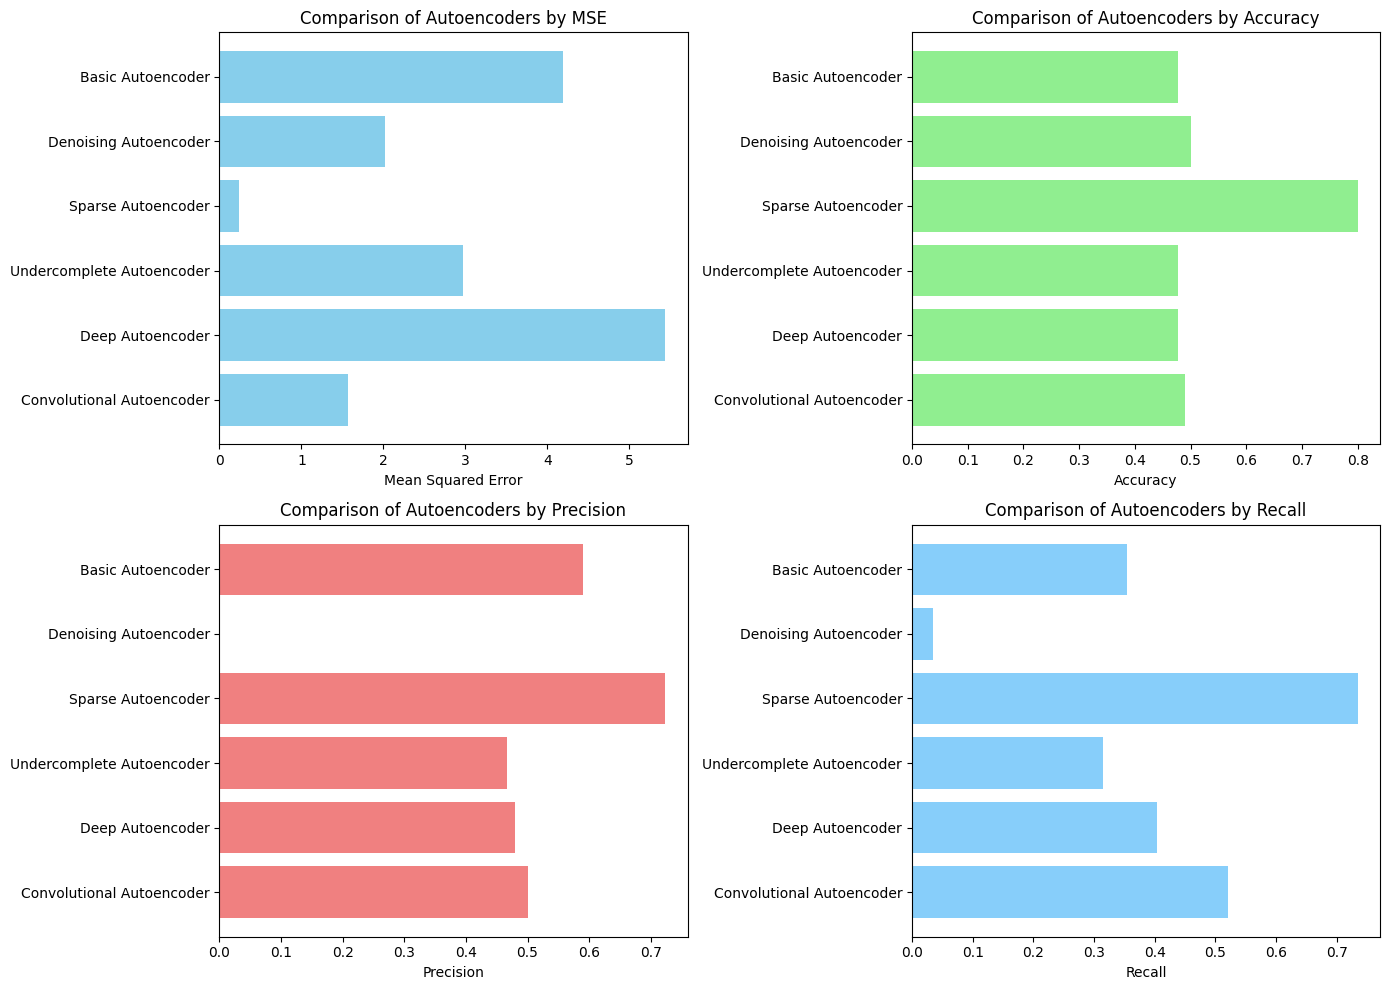

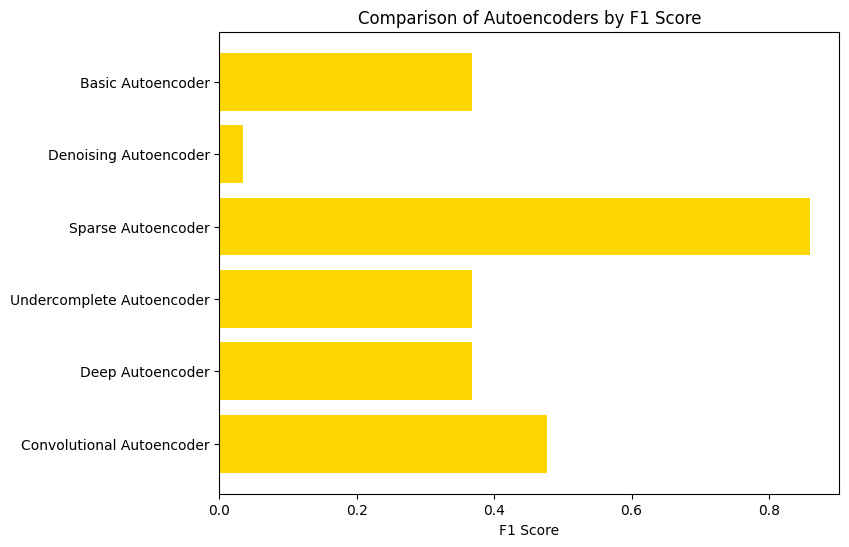

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Example data - replace with your actual values
autoencoder_names = [
    'Basic Autoencoder', 'Denoising Autoencoder', 'Sparse Autoencoder',
    'Undercomplete Autoencoder', 'Deep Autoencoder', 'Convolutional Autoencoder'
]

mse_values = [
    4.186159912933363,2.02229034584888,0.23848363757133484, 2.9716920835198835,5.437788331619231,1.5669049844291294
]

accuracy_values = [
   0.4782608695, 0.5, 0.8, 0.47826086, 0.47826086, 0.49   # Example accuracy values (replace with actual)
]

precision_values = [
    0.58965,0.00002,0.7234,0.4666666,0.48,0.5000002 # Example precision values (replace with actual)
]

recall_values = [
    0.354347826086,0.0341,0.73456,0.314347826086,0.404347826086,0.5211 # Example recall values (replace with actual)
]

f1_values = [
    0.36842105263,0.034251,0.859853,0.36842105263,0.36842105263,0.4768352  # Example F1 score values (replace with actual)
]

# Plotting MSEs
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.barh(autoencoder_names, mse_values, color='skyblue')
plt.xlabel('Mean Squared Error')
plt.title('Comparison of Autoencoders by MSE')
plt.gca().invert_yaxis()

# Plotting Accuracy
plt.subplot(2, 2, 2)
plt.barh(autoencoder_names, accuracy_values, color='lightgreen')
plt.xlabel('Accuracy')
plt.title('Comparison of Autoencoders by Accuracy')
plt.gca().invert_yaxis()

# Plotting Precision
plt.subplot(2, 2, 3)
plt.barh(autoencoder_names, precision_values, color='lightcoral')
plt.xlabel('Precision')
plt.title('Comparison of Autoencoders by Precision')
plt.gca().invert_yaxis()

# Plotting Recall
plt.subplot(2, 2, 4)
plt.barh(autoencoder_names, recall_values, color='lightskyblue')
plt.xlabel('Recall')
plt.title('Comparison of Autoencoders by Recall')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Plotting F1 Score
plt.figure(figsize=(8, 6))
plt.barh(autoencoder_names, f1_values, color='gold')
plt.xlabel('F1 Score')
plt.title('Comparison of Autoencoders by F1 Score')
plt.gca().invert_yaxis()
plt.show()
